In [1]:
%matplotlib inline

This note will show you how to use BigBang to investigate a particular project participant's activity.

We will focus on Fernando Perez's role within the IPython community.

First, imports.

In [2]:
from bigbang.archive import Archive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's get all the available date from the IPython community. For now, this is just the mailing lists. One day, BigBang will also get its issue tracker data! That will be very exciting.

In [3]:
url = "ipython-user"
arx = Archive(url,archive_dir="../archives")

Now let's isolate the messages involving Fernando Perez.

This includes both messages from Fernando, and messages to Fernando.

In [4]:
fernandos = Archive(arx.data[arx.data.From.map(lambda x: 'Fernando' in x)])
fernandos.data[:3]

,Message-ID,From,Subject,Date,In-Reply-To,References,Body
8665,<3E8364F0.2000107@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-user] Crash,2003-03-27 20:54:08,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin Siebler wrote:\n> I installed IPython-0....
8686,<3E8364F0.2000107@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-user] Crash,2003-03-27 20:54:08,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin Siebler wrote:\n> I installed IPython-0....
8667,<3E836641.8000008@colorado.edu>,fperez@colorado.edu (Fernando Perez),[IPython-user] IPython under Jython?,2003-03-27 20:59:45,<1048798697.25990.6.camel@localhost.localdomain>,<1048798697.25990.6.camel@localhost.localdomain>,Jason Ives wrote:\n\n> I'm wondering if anyone...


Note that our way of finding Fernando Perez was not very precise. We've picked up another Fernando.

In [5]:
[x for x in fernandos.get_activity()]

/home/sb/projects/bigbang/bigbang/archive.py:85: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  mdf2['Date'] = mdf['Date'].apply(lambda x: x.toordinal())


['Fernando.Perez at colorado.edu (Fernando Perez)',
 'Fernando.Perez at colorado.edu (Fernando.Perez at colorado.edu)',
 'Fernando.Perez at colorado.edu (Fernando.Perez@colorado.edu)',
 'Fernando.Perez-1 at colorado.edu (Fernando Perez)',
 'Fernando.Perez@berkeley.... (Fernando Perez)',
 'Fernando.Perez@colorado.... (Fernando Perez)',
 'fperez at colorado.edu (Fernando Perez)',
 'fperez.net at gmail.com (Fernando Perez)',
 'fperez.net@gmail.... (Fernando Perez)',
 'fperez@colorado.edu (Fernando Perez)',
 'ipython at gmail.com (Fernando Perez)']

In future iterations, we will use a more sensitive entity recognition technique to find Fernando. This will have to do for now.

We will also need the data for all the emails that were *not* sent by Fernando.

In [6]:
not_fernandos = Archive(arx.data[arx.data.From.map(lambda x: 'Fernando' not in x)])
not_fernandos.data[:3]

,Message-ID,From,Subject,Date,In-Reply-To,References,Body
8664,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin.Siebler@palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08,None,None,"I installed IPython-0.2.15pre3, played with it..."
8685,<3271DBB88437ED41A0AB239E6C2554A401117873@ussu...,Robin.Siebler at palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08,None,None,"I installed IPython-0.2.15pre3, played with it..."
8666,<1048798697.25990.6.camel@localhost.localdomain>,jives@gorge.net (Jason Ives),[IPython-user] IPython under Jython?,2003-03-27 20:58:15,None,None,"Hi,\n\nI'm wondering if anyone's had success r..."


We now have two Archives made from the original Archive, with the same range of dates, but one with and the other without Fernando. Both contain emails from many addresses. We want to get a single metric of activity.

In [7]:
not_fernandos.get_activity().sum(1).values.shape

(4218,)

In [8]:
nf = pd.DataFrame(not_fernandos.get_activity().sum(1))

In [9]:
f = pd.DataFrame(fernandos.get_activity().sum(1))

In [10]:
both = pd.merge(nf,f,how="outer",left_index=True,right_index=True,suffixes=("_nf","_f")).fillna(0)

Let's make a stackplot of this data to see how much of the conversation on the IPython developer's list has been Fernando, over time.

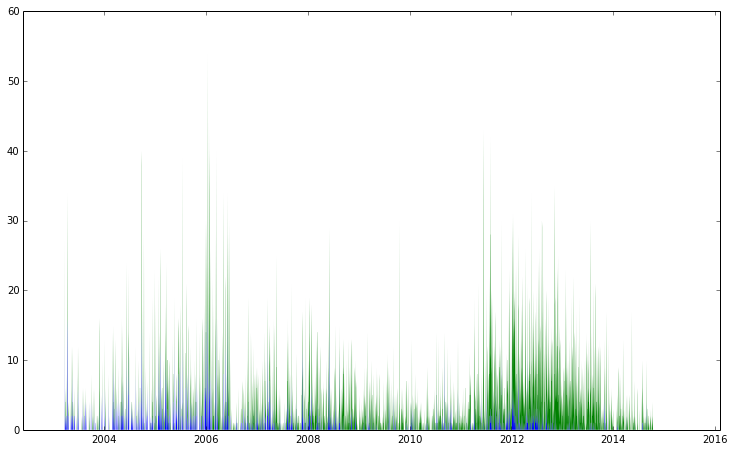

In [11]:
fig = plt.figure(figsize=(12.5, 7.5))

fa = fernandos.get_activity()

d = np.row_stack((both['0_f'],
                  both['0_nf']))

plt.stackplot(both.index.values,d,linewidth=0,label='foo')

fig.axes[0].xaxis_date()

plt.show()

The blue represents Fernando's contributions to the list. The green are the contributions of others.